In [1]:
import numpy as np

import onlinecp.algos as algos
import onlinecp.utils.evaluation as ev
import onlinecp.utils.feature_functions as feat
import onlinecp.utils.gendata as gd

In [7]:
import sklearn 

In [46]:
t = np.load('tyler.npz')

In [47]:
t.__dict__

{'_files': ['detection_stat.npy',
  'online_th.npy',
  'ground_truth.npy',
  'EDD.npy',
  'FA.npy',
  'ND.npy',
  'EDDth.npy',
  'FAth.npy',
  'NDth.npy'],
 'files': ['detection_stat',
  'online_th',
  'ground_truth',
  'EDD',
  'FA',
  'ND',
  'EDDth',
  'FAth',
  'NDth'],
 'allow_pickle': False,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='tyler.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x7f15e6a6d6a0>,
 'fid': <_io.BufferedReader name='tyler.npz'>}

In [49]:
t['ground_truth'].shape

(80000,)

In [ ]:
parser.add_argument('-n', type=int, default=2000, help='number of samples for each distribution')
parser.add_argument('-nb', type=int, default=500, help='number of changes of distribution in the series')
parser.add_argument('-d', type=int, default=100, help='dimensionality of the samples in the time series')

In [5]:
# default data settings
n=2000
nb_change=500
d=100

In [6]:
# parameters of gmm
k = 10
std_mean = 0.11  # the bigger, the more change in means
wishart = 5  # the bigger, the less change in diagonal variances

X, ground_truth = gd.stream_GMM(d=d, n=n, nb_change=nb_change, std_mean=std_mean, 
                                concentration_wishart=wishart, k=k)

AttributeError: module 'sklearn.mixture' has no attribute 'gaussian_mixture'

In [ ]:
# each row is a data point, each col is a feature/dimension
X.shape

In [2]:
gd.stream_GMM?

In [17]:
X2, truth = gd.stream_GMM(d=1, nb_change=2, n=1000)

In [43]:

# Data generation
n = 1000
nb_change = 100
d = 5
mult = 1.

# parameters of gmm
k = 10
std_mean = 0.11  # the bigger, the more change in means
wishart = 5  # the bigger, the less change in diagonal variances

X, ground_truth = gd.stream_GMM(d=d, n=n, nb_change=nb_change, std_mean=std_mean, concentration_wishart=wishart,
                                k=k)

# common config
choice_sigma = 'median'
numel = 100
data_sigma_estimate = X[:numel]  # data for median trick to estimate sigma
B = 250 # window size

# Scan-B config
N = 3  # number of windows in scan-B

# Newma and MA config
big_Lambda, small_lambda = algos.select_optimal_parameters(B)  # forget factors chosen with heuristic in the paper
thres_ff = small_lambda
# number of random features is set automatically with this criterion
m = int((1 / 4) / (small_lambda + big_Lambda) ** 2)
m_OPU = 10 * m
W, sigmasq = feat.generate_frequencies(m, d, data=data_sigma_estimate, choice_sigma=choice_sigma)

detector = algos.ScanB(X[0], kernel_func=lambda x, y: feat.gauss_kernel(x, y, np.sqrt(sigmasq)), window_size=B,
                       nbr_windows=N, adapt_forget_factor=thres_ff)
detector.apply_to_data(X)


# detector = algos.NEWMA(X[0], forget_factor=big_Lambda, forget_factor2=small_lambda,
#                        adapt_forget_factor=thres_ff)
# detector.apply_to_data(X)


# compute performance metrics
detection_stat = np.array([i[0] for i in detector.stat_stored])[int(10 * n):]  # padding
online_th = np.array([i[1] for i in detector.stat_stored])[int(10 * n):]
ground_truth = ground_truth[int(10 * n):]

# display perf
EDD, FA, ND = ev.compute_curves(ground_truth, detection_stat, num_points=30, start_coeff=1.05, end_coeff=1.2)
EDDth, FAth, NDth = ev.compute_curves(ground_truth, detection_stat, num_points=1,
                                      thres_values=online_th, start_coeff=1, end_coeff=1)



Evaluate performance 0 / 30
Evaluate performance 1 / 30
Evaluate performance 2 / 30
Evaluate performance 3 / 30
Evaluate performance 4 / 30
Evaluate performance 5 / 30
Evaluate performance 6 / 30
Evaluate performance 7 / 30
Evaluate performance 8 / 30
Evaluate performance 9 / 30
Evaluate performance 10 / 30
Evaluate performance 11 / 30
Evaluate performance 12 / 30
Evaluate performance 13 / 30
Evaluate performance 14 / 30
Evaluate performance 15 / 30
Evaluate performance 16 / 30
Evaluate performance 17 / 30
Evaluate performance 18 / 30
Evaluate performance 19 / 30
Evaluate performance 20 / 30
Evaluate performance 21 / 30
Evaluate performance 22 / 30
Evaluate performance 23 / 30
Evaluate performance 24 / 30
Evaluate performance 25 / 30
Evaluate performance 26 / 30
Evaluate performance 27 / 30
Evaluate performance 28 / 30
Evaluate performance 29 / 30
Evaluate performance 0 / 1


In [44]:
EDD

array([ 164.8313253 ,  167.46341463,  168.01219512,  168.54878049,
        167.82716049,  167.62962963,  169.40740741,  164.91139241,
        164.78481013,  165.        ,  167.25316456,  166.64102564,
        166.82051282,  166.92307692,  163.19480519,  164.15789474,
        166.60526316,  166.86842105,  167.26315789,  167.73684211,
        168.11842105,  168.82894737,  169.90789474,  170.28947368,
        170.55263158,  171.82894737,  172.30666667,  173.28378378,
        173.40540541,  173.71621622])

In [47]:
ground_truth

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [37]:
np.where(ground_truth==1)

(array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000,
        27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000,
        36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000,
        45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000,
        54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000,
        63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000,
        72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000,
        81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000]),)

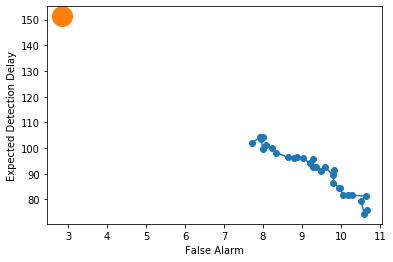

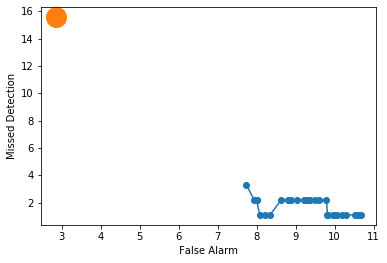

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(FA, EDD, '-o', label='')
plt.plot(FAth, EDDth, 'o', markersize=20)
plt.xlabel('False Alarm')
plt.ylabel('Expected Detection Delay')
plt.show()

plt.figure()
plt.plot(FA, ND, '-o')
plt.plot(FAth, NDth, 'o', markersize=20)
plt.xlabel('False Alarm')
plt.ylabel('Missed Detection')
plt.show()